In [1]:
#!pip install --upgrade google-api-python-client
#!pip install oauth2client

from googleapiclient.discovery import build
from googleapiclient.errors import HttpError
from oauth2client.tools import argparser

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import apikey

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
warnings.filterwarnings('ignore')

In [2]:
dev_key = apikey.api_key
api_service_name = "youtube"
api_ver = "v3"

In [3]:
youtube = build(api_service_name, api_ver, developerKey = dev_key)

In [4]:
search_response = youtube.search().list(
    q = "공부하는섭이",
    order = "relevance",
    part = "snippet",
    maxResults = 50
    ).execute()

In [5]:
channel_id = search_response['items'][0]['id']['channelId']

In [6]:
playlists = youtube.playlists().list(
    channelId = channel_id,
    part = "snippet",
    maxResults = 20
    ).execute()

In [7]:
import pandas as pd

ids=[]
titles=[]
for i in playlists['items']:
    ids.append(i['id'])
    titles.append(i['snippet']['title'])
    
df=pd.DataFrame([ids,titles]).T
df.columns=['PlayLists','Titles']

df.head(5)

,PlayLists,Titles
0,PLfkfgvn_kFAU6nfQ-zL_JV8D_SWeHVuRV,Shorts
1,PLfkfgvn_kFAX8jvsuRcoFp6CFPAUehok8,일상 Vlog
2,PLfkfgvn_kFAV4YksRjqGU_H9dWmMRylSG,Q&A / 정보 제공


In [8]:
#Videos' list
dtcu=df['PlayLists'][0]
playlist_videos=youtube.playlistItems().list(
    playlistId=dtcu,
    part='snippet',
    maxResults=50)

playlistitems_list_response=playlist_videos.execute()

video_names=[]
video_ids=[]
date=[]

for v in playlistitems_list_response['items']:
    video_names.append(v['snippet']['title'])
    video_ids.append(v['snippet']['resourceId']['videoId'])
    date.append(v['snippet']['publishedAt'])
    
vdf=pd.DataFrame([date,video_names,video_ids]).T
vdf.columns=['Date','Title','IDS']
vdf['ListNo'] = 1
vdf

,Date,Title,IDS,ListNo
0,2022-08-20T20:27:40Z,한국 음식이 너무 그리운(?) 미국 유학생 #shorts,EQ4xjclxig0,1
1,2022-08-20T20:27:40Z,미국에서 보내는 첫 생일 #Shorts,AA2ls2fBwdU,1
2,2022-08-20T20:27:40Z,맛이 가버린 텍사스 날씨 #shorts,o12WipNjpwM,1
3,2022-08-20T20:27:40Z,새해를 맞이하는 게으른 유학생의 자세 #Shorts,RqM5xtkC5HM,1
4,2022-08-20T20:27:40Z,#Shorts Merry Christmas! 미국 유학생이 크리스마스 즐기는 법,uTeI3PZPAD0,1
5,2022-08-20T20:27:40Z,"IPhone 13 Pro 예구 - 컴퓨터, 아이패드 다음은 아이폰이에요 #shorts",Kfzax_mz-lA,1
6,2022-08-20T20:27:40Z,이것이 미국의 스케일.. This is America #shorts,yXLNw6gebsA,1
7,2022-08-20T20:28:50Z,낮에 영상 20도인데 밤에 눈이 온다? #shorts,7mzOuRN1zq0,1


In [9]:
dtcu2=df['PlayLists'][1]
playlist_videos=youtube.playlistItems().list(
    playlistId=dtcu2,
    part='snippet',
    maxResults=50)

playlistitems_list_response=playlist_videos.execute()

video_names=[]
video_ids=[]
date=[]

for v in playlistitems_list_response['items']:
    video_names.append(v['snippet']['title'])
    video_ids.append(v['snippet']['resourceId']['videoId'])
    date.append(v['snippet']['publishedAt'])
    
vdf2=pd.DataFrame([date,video_names,video_ids]).T
vdf2.columns=['Date','Title','IDS']
vdf2['ListNo'] = 2
vdf2

,Date,Title,IDS,ListNo
0,2022-08-20T20:26:52Z,미국 대학원생 여름학기 일상 Vlog - 벌써 1년?,fLA0abcqyTE,2
1,2022-08-20T20:26:52Z,미국 인턴 구르는 Vlog - 본격 예비 외노자(되고싶다)의 미국 회사 체험,aBtYmx-AhlU,2
2,2022-08-20T20:26:52Z,여름방학 맞아 푹 삶아진(?) 미국 대학원생 Vlog - 응 몰라 일단 쉴거야,frxWAxQvPcw,2
3,2022-08-20T20:26:52Z,기말고사까지 우당탕탕 치른 미국 대학원생 Vlog - 이겨내는 것이 아니라 버티는 것이다,5TQPtOVdr9Y,2
4,2022-08-20T20:26:52Z,또 첫 학기 어찌저찌 보낸 미국 대학원생 Vlog - 달라지기 위한 나날들,am2TFveOX08,2
5,2022-08-20T20:26:52Z,미국 대학원생 방학에 좀 숨 돌리는 Vlog - 아니 왜 벌써 개강인데.....?,mtPM6m3J0QU,2
6,2022-08-20T20:26:52Z,미국 대학원생 연말 홀로 즐기는 Vlog - 혼자서도 연말 잘 보내는 방법,fRLiHCW-HXA,2
7,2022-08-20T20:26:52Z,해커톤 해도 됩니까? - 미국 대학원생 첫 해커톤 Vlog,sAVPn9qOdcc,2
8,2022-08-20T20:26:52Z,미국 대학원생 첫학기 드디어 끝난 Vlog - 해방이니?,7DaoE5EUDIw,2
9,2022-08-20T20:26:52Z,미국 대학원생 중간고사 끝난 Vlog - 도랏나 왜 똑같은데,NpXESg1GqRk,2


In [10]:
dtcu3=df['PlayLists'][2]
playlist_videos=youtube.playlistItems().list(
    playlistId=dtcu3,
    part='snippet',
    maxResults=50)

playlistitems_list_response=playlist_videos.execute()

video_names=[]
video_ids=[]
date=[]

for v in playlistitems_list_response['items']:
    video_names.append(v['snippet']['title'])
    video_ids.append(v['snippet']['resourceId']['videoId'])
    date.append(v['snippet']['publishedAt'])
    
vdf3=pd.DataFrame([date,video_names,video_ids]).T
vdf3.columns=['Date','Title','IDS']
vdf3['ListNo'] = 3

In [11]:
# Appending all lists into one single dataframe and reset the index to aviod index duplication
tdf = vdf.append(vdf2)
tdf = tdf.append(vdf3)
tdf.reset_index(inplace=True, drop=True)
tdf
#tdf['IDS'][0]

,Date,Title,IDS,ListNo
0,2022-08-20T20:27:40Z,한국 음식이 너무 그리운(?) 미국 유학생 #shorts,EQ4xjclxig0,1
1,2022-08-20T20:27:40Z,미국에서 보내는 첫 생일 #Shorts,AA2ls2fBwdU,1
2,2022-08-20T20:27:40Z,맛이 가버린 텍사스 날씨 #shorts,o12WipNjpwM,1
3,2022-08-20T20:27:40Z,새해를 맞이하는 게으른 유학생의 자세 #Shorts,RqM5xtkC5HM,1
4,2022-08-20T20:27:40Z,#Shorts Merry Christmas! 미국 유학생이 크리스마스 즐기는 법,uTeI3PZPAD0,1
5,2022-08-20T20:27:40Z,"IPhone 13 Pro 예구 - 컴퓨터, 아이패드 다음은 아이폰이에요 #shorts",Kfzax_mz-lA,1
6,2022-08-20T20:27:40Z,이것이 미국의 스케일.. This is America #shorts,yXLNw6gebsA,1
7,2022-08-20T20:28:50Z,낮에 영상 20도인데 밤에 눈이 온다? #shorts,7mzOuRN1zq0,1
8,2022-08-20T20:26:52Z,미국 대학원생 여름학기 일상 Vlog - 벌써 1년?,fLA0abcqyTE,2
9,2022-08-20T20:26:52Z,미국 인턴 구르는 Vlog - 본격 예비 외노자(되고싶다)의 미국 회사 체험,aBtYmx-AhlU,2


In [18]:
# Dislike count value has been removed according to Youtube's policy of not exposing the count of dislike.

import re

category_id=[]
views=[]
likes=[]
comments=[]
mins=[]
seconds=[]
title=[]
date=[]

for u in range(len(tdf)):
    request=youtube.videos().list(
    part='snippet,contentDetails,statistics',
    id=tdf['IDS'][u])
    
    response=request.execute()
    
    if response['items']==[]:
        ids.append('-')
        category_id.append('-')
        views.append('-')
        likes.append('-')
        comments.append('-')
        date.append('-')
        
    else :
        title.append(response['items'][0]['snippet']['title'])
        category_id.append(response['items'][0]['snippet']['categoryId'])
        views.append(response['items'][0]['statistics']['viewCount'])
        likes.append(response['items'][0]['statistics']['likeCount'])
        comments.append(response['items'][0]['statistics']['commentCount'])
        date.append(response['items'][0]['snippet']['publishedAt'])
        
dtcu_df=pd.DataFrame([title,category_id,views,likes,comments,date]).T
dtcu_df.columns=['title','category_id','views','likes','comments','date']
dtcu_df['IDS'] = tdf['IDS']
dtcu_df

,title,category_id,views,likes,comments,date,IDS
0,한국 음식이 너무 그리운(?) 미국 유학생 #shorts,22,659,15,13,2022-08-10T01:50:16Z,EQ4xjclxig0
1,미국에서 보내는 첫 생일 #Shorts,22,388,32,14,2022-06-08T13:20:18Z,AA2ls2fBwdU
2,맛이 가버린 텍사스 날씨 #shorts,27,327,14,2,2022-04-05T09:07:09Z,o12WipNjpwM
3,새해를 맞이하는 게으른 유학생의 자세 #Shorts,27,269,11,6,2022-01-08T07:46:42Z,RqM5xtkC5HM
4,#Shorts Merry Christmas! 미국 유학생이 크리스마스 즐기는 법,27,317,15,3,2021-12-25T05:49:16Z,uTeI3PZPAD0
5,"IPhone 13 Pro 예구 - 컴퓨터, 아이패드 다음은 아이폰이에요 #shorts",27,434,19,12,2021-09-18T09:00:07Z,Kfzax_mz-lA
6,이것이 미국의 스케일.. This is America #shorts,27,772,18,12,2021-08-11T02:47:58Z,yXLNw6gebsA
7,낮에 영상 20도인데 밤에 눈이 온다? #shorts,27,179,6,4,2022-02-04T10:00:45Z,7mzOuRN1zq0
8,미국 대학원생 여름학기 일상 Vlog - 벌써 1년?,22,504,52,28,2022-07-31T11:00:31Z,fLA0abcqyTE
9,미국 인턴 구르는 Vlog - 본격 예비 외노자(되고싶다)의 미국 회사 체험,22,1466,46,38,2022-06-18T23:58:09Z,aBtYmx-AhlU


In [19]:
# Sorted lists merging - validation checked
dtcu_df['cat_clean'] = 0
for i in range(len(tdf)):
    if tdf['Title'][i] == dtcu_df['title'][i]:
        dtcu_df['cat_clean'][i] = tdf['ListNo'][i]
dtcu_df

,title,category_id,views,likes,comments,date,IDS,cat_clean
0,한국 음식이 너무 그리운(?) 미국 유학생 #shorts,22,659,15,13,2022-08-10T01:50:16Z,EQ4xjclxig0,1
1,미국에서 보내는 첫 생일 #Shorts,22,388,32,14,2022-06-08T13:20:18Z,AA2ls2fBwdU,1
2,맛이 가버린 텍사스 날씨 #shorts,27,327,14,2,2022-04-05T09:07:09Z,o12WipNjpwM,1
3,새해를 맞이하는 게으른 유학생의 자세 #Shorts,27,269,11,6,2022-01-08T07:46:42Z,RqM5xtkC5HM,1
4,#Shorts Merry Christmas! 미국 유학생이 크리스마스 즐기는 법,27,317,15,3,2021-12-25T05:49:16Z,uTeI3PZPAD0,1
5,"IPhone 13 Pro 예구 - 컴퓨터, 아이패드 다음은 아이폰이에요 #shorts",27,434,19,12,2021-09-18T09:00:07Z,Kfzax_mz-lA,1
6,이것이 미국의 스케일.. This is America #shorts,27,772,18,12,2021-08-11T02:47:58Z,yXLNw6gebsA,1
7,낮에 영상 20도인데 밤에 눈이 온다? #shorts,27,179,6,4,2022-02-04T10:00:45Z,7mzOuRN1zq0,1
8,미국 대학원생 여름학기 일상 Vlog - 벌써 1년?,22,504,52,28,2022-07-31T11:00:31Z,fLA0abcqyTE,2
9,미국 인턴 구르는 Vlog - 본격 예비 외노자(되고싶다)의 미국 회사 체험,22,1466,46,38,2022-06-18T23:58:09Z,aBtYmx-AhlU,2


## Data Glancing

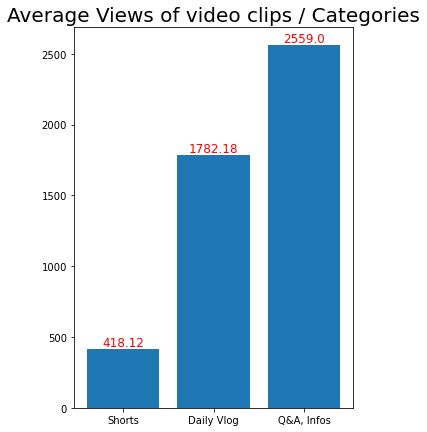

In [20]:
# Labeling
# Cat1 = Shorts
# Cat2 = Daily Vlog
# Cat3 = Q&A, Infos

cal_1 = dtcu_df[dtcu_df['cat_clean'] == 1]
cal_2 = dtcu_df[dtcu_df['cat_clean'] == 2]
cal_3 = dtcu_df[dtcu_df['cat_clean'] == 3]

comp1 = pd.to_numeric(cal_1[['category_id', 'views']].views).mean()
comp2 = pd.to_numeric(cal_2[['category_id', 'views']].views).mean()
comp3 = pd.to_numeric(cal_3[['category_id', 'views']].views).mean()
compf = [round(comp1, 2), round(comp2, 2), round(comp3, 2)]
compf

plt.figure(figsize=(5, 7))
x = np.arange(3)
cat_label = ['Shorts', 'Daily Vlog', 'Q&A, Infos']

plt.bar(x, compf)
plt.xticks(x, cat_label)

for i, v in enumerate(x):
    plt.text(v, compf[i], str(compf[i]),
             fontsize=12,
             color="red",
             horizontalalignment='center',
             verticalalignment='bottom')

plt.title('Average Views of video clips / Categories', fontsize=20)
plt.show()

In [21]:
from datetime import datetime, date

dtcu_df['weekday'] = 0
dateDict = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

for i in range(len(dtcu_df)):
    dtcu_df['date'][i] = (dtcu_df['date'][i][:10])
    dtcu_df['date'][i] = datetime.strptime(dtcu_df['date'][i], '%Y-%m-%d')
    dtcu_df['weekday'][i] = dtcu_df['date'][i].weekday()
    dtcu_df['weekday'][i] = dateDict[dtcu_df['weekday'][i]]

In [22]:
dtcu_df.head(10)

,title,category_id,views,likes,comments,date,IDS,cat_clean,weekday
0,한국 음식이 너무 그리운(?) 미국 유학생 #shorts,22,659,15,13,2022-08-10 00:00:00,EQ4xjclxig0,1,Wed
1,미국에서 보내는 첫 생일 #Shorts,22,388,32,14,2022-06-08 00:00:00,AA2ls2fBwdU,1,Wed
2,맛이 가버린 텍사스 날씨 #shorts,27,327,14,2,2022-04-05 00:00:00,o12WipNjpwM,1,Tue
3,새해를 맞이하는 게으른 유학생의 자세 #Shorts,27,269,11,6,2022-01-08 00:00:00,RqM5xtkC5HM,1,Sat
4,#Shorts Merry Christmas! 미국 유학생이 크리스마스 즐기는 법,27,317,15,3,2021-12-25 00:00:00,uTeI3PZPAD0,1,Sat
5,"IPhone 13 Pro 예구 - 컴퓨터, 아이패드 다음은 아이폰이에요 #shorts",27,434,19,12,2021-09-18 00:00:00,Kfzax_mz-lA,1,Sat
6,이것이 미국의 스케일.. This is America #shorts,27,772,18,12,2021-08-11 00:00:00,yXLNw6gebsA,1,Wed
7,낮에 영상 20도인데 밤에 눈이 온다? #shorts,27,179,6,4,2022-02-04 00:00:00,7mzOuRN1zq0,1,Fri
8,미국 대학원생 여름학기 일상 Vlog - 벌써 1년?,22,504,52,28,2022-07-31 00:00:00,fLA0abcqyTE,2,Sun
9,미국 인턴 구르는 Vlog - 본격 예비 외노자(되고싶다)의 미국 회사 체험,22,1466,46,38,2022-06-18 00:00:00,aBtYmx-AhlU,2,Sat


## Extraction Reply

In [76]:
youtube = build(api_service_name, api_ver, developerKey = dev_key)

reviews = []

for i in range(len(dtcu_df)):
    cm = youtube.commentThreads().list(
        videoId = dtcu_df['IDS'][i],
        order = 'relevance',
        part = 'snippet',
        maxResults = 100
    ).execute()
    for i in cm['items']:
        reviews.append(i['snippet']['topLevelComment']['snippet']['textOriginal'])

adf = pd.DataFrame(reviews, columns=['Comments'])
adf

,Comments
0,요즘은 정말 한식이 많아져서~사실 맛있는곳도 많아서 유학생활 할때 참 도움이 많이 ...
1,영상 항상 잘 보고있습니다 :) 이번 영상은 bgm이 너무 좋아서 찾아봤네요ㅎㅎ 덕...
2,화이팅입니다 항상 챙겨보면서 응원하고있어요
3,달라스 클라쓰 🤭
4,사실 한국 어딘가에 있었다는
...,...
414,형님 감사합니다!!
415,와 정말 적게 쓰시네요!! 대학원생활하면서 살림이 가능하신가용?? 저는 맨날 사먹거...
416,혹시 박사생이시면 텍사스 지역 스트라이펜드 얼마정도 받으세요??
417,스타벅스는 정말 국룰이군요..ㅋㅋㅋㅋㅋ 커피만은 포기못해.....
